In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
%matplotlib inline

In [494]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  

In [495]:
import warnings
warnings.filterwarnings("ignore")

In [496]:
customers_data = pd.read_excel('CustomersData.xlsx')
tax_amount = pd.read_excel('Tax_amount.xlsx')
marketing_spend = pd.read_csv('Marketing_Spend.csv')
online_sales = pd.read_csv('Online_Sales.csv')
discount_coupon = pd.read_csv('Discount_Coupon.csv')



In [498]:
print(customers_data.shape)
print(tax_amount.shape)
print(marketing_spend.shape)
print(online_sales.shape)
print(discount_coupon.shape)

(1468, 4)
(20, 2)
(365, 3)
(52924, 10)
(204, 4)


In [499]:
customers_data.head()


,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [500]:
customers_data.isna().sum()

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [501]:
tax_amount.head()


,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [502]:
tax_amount.isna().sum()

Product_Category    0
GST                 0
dtype: int64

In [503]:
marketing_spend.head()


,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [504]:
marketing_spend.isna().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [505]:
marketing_spend.columns


Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object')

In [506]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [507]:
online_sales.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [508]:
online_sales.dropna(inplace=True)

In [509]:
online_sales.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [510]:
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [511]:
discount_coupon.isna().sum()

Month                0
Product_Category     0
Coupon_Code          0
Discount_pct         0
dtype: int64

In [512]:
discount_coupon.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [513]:
discount_coupon.columns= ['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct']

In [514]:
print(customers_data.shape)
print(tax_amount.shape)
print(marketing_spend.shape)
print(online_sales.shape)
print(discount_coupon.shape)

(1468, 4)
(20, 2)
(365, 3)
(52924, 10)
(204, 4)


In [515]:
# Convert date columns to datetime

online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'], format='%Y%m%d')
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])


In [516]:
online_sales.rename(columns={'Transaction_Date': 'Date'}, inplace=True)


In [517]:
online_sales['Month'] = online_sales['Date'].dt.strftime('%b')


In [518]:
# Merge the Online Sales data with Discount Coupon and Tax Amount data

merged_data = pd.merge(online_sales, discount_coupon,  on=['Month', 'Product_Category'], how='left')
merged_data = pd.merge(merged_data, tax_amount, on='Product_Category', how='left')
merged_data = pd.merge(merged_data, customers_data, on='CustomerID', how='left')


In [519]:
merged_data.tail()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,30.0,0.10,F,New York,45
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,SALE30,30.0,0.18,F,New York,45
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,30.0,0.10,F,New York,45
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,30.0,0.10,F,California,7
52923,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,Dec,ELEC30,30.0,0.10,F,California,7


In [520]:
merged_data = pd.merge(merged_data, marketing_spend, on='Date', how='left')

In [521]:


merged_data.head()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12,4500,2424.5
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12,4500,2424.5
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,M,Chicago,12,4500,2424.5
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,M,Chicago,12,4500,2424.5
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,M,Chicago,12,4500,2424.5


In [522]:
# Calculate the Invoice Value for each transaction

merged_data['Invoice_Value'] = (
    merged_data['Quantity'] * merged_data['Avg_Price'] * 
    (1 - merged_data['Discount_pct'] / 100) * 
    (1 + merged_data['GST'] / 100) + 
    merged_data['Delivery_Charges']
)

merged_data.head()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12,4500,2424.5,144.977339
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12,4500,2424.5,144.977339
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,M,Chicago,12,4500,2424.5,8.346845
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,M,Chicago,12,4500,2424.5,85.526993
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,M,Chicago,12,4500,2424.5,21.376730


## Exploratory Data Analysis

In [523]:
# Understanding How Many Customers Acquired Every Month


In [524]:
# Extract year and month from Transaction_Date
online_sales['YearMonth'] = online_sales['Date'].dt.to_period('M')

# Calculate the number of new customers acquired each month
first_purchase = online_sales.groupby('CustomerID')['Date'].min().reset_index()
first_purchase['YearMonth'] = first_purchase['Date'].dt.to_period('M')

monthly_acquisition = first_purchase.groupby('YearMonth')['CustomerID'].nunique().reset_index()
monthly_acquisition.columns = ['YearMonth', 'New_Customers']

print(monthly_acquisition)


   YearMonth  New_Customers
0    2019-01            215
1    2019-02             96
2    2019-03            177
3    2019-04            163
4    2019-05            112
5    2019-06            137
6    2019-07             94
7    2019-08            135
8    2019-09             78
9    2019-10             87
10   2019-11             68
11   2019-12            106


In [525]:
# Retention of Customers on Month-on-Month Basis

In [526]:
# Count of customers in each month

monthly_customers = online_sales.groupby(['YearMonth'])['CustomerID'].nunique().reset_index()
monthly_customers.columns = ['YearMonth', 'Total_Customers']

# Merge with monthly acquisition to calculate retained customers

retention = pd.merge(monthly_customers, monthly_acquisition, on='YearMonth', how='left')
retention['Retained_Customers'] = retention['Total_Customers'] - retention['New_Customers']

print(retention)


   YearMonth  Total_Customers  New_Customers  Retained_Customers
0    2019-01              215            215                   0
1    2019-02              109             96                  13
2    2019-03              208            177                  31
3    2019-04              224            163                  61
4    2019-05              200            112                  88
5    2019-06              259            137                 122
6    2019-07              236             94                 142
7    2019-08              300            135                 165
8    2019-09              193             78                 115
9    2019-10              210             87                 123
10   2019-11              188             68                 120
11   2019-12              236            106                 130


In [527]:
#Revenue Analysis from Existing and New Customers


In [528]:
# Merge the Online Sales data with the calculated first purchase date

online_sales = pd.merge(online_sales, first_purchase[['CustomerID', 'YearMonth']], on='CustomerID', how='left', suffixes=('', '_FirstPurchase'))
online_sales['Invoice_Value']= merged_data['Invoice_Value']
# Define customer type

online_sales['Customer_Type'] = np.where(online_sales['YearMonth'] == online_sales['YearMonth_FirstPurchase'], 'New', 'Existing')

# Calculate revenue by customer type and month

revenue_by_type = online_sales.groupby(['YearMonth', 'Customer_Type'])['Invoice_Value'].sum().reset_index()

print(revenue_by_type)


   YearMonth Customer_Type  Invoice_Value
0    2019-01           New  419758.456354
1    2019-02      Existing   37362.671277
2    2019-02           New  258042.703395
3    2019-03      Existing   49980.869957
4    2019-03           New  251620.320747
5    2019-04      Existing  162692.388808
6    2019-04           New  235835.992713
7    2019-05      Existing  102630.348205
8    2019-05           New  181578.331349
9    2019-06      Existing  105592.420459
10   2019-06           New  155087.766398
11   2019-07      Existing  229724.501052
12   2019-07           New  151253.838414
13   2019-08      Existing  198597.780254
14   2019-08           New  181909.517224
15   2019-09      Existing  172687.090922
16   2019-09           New  120207.318017
17   2019-10      Existing  191909.948642
18   2019-10           New  221547.148563
19   2019-11      Existing  251186.717357
20   2019-11           New  188330.622037
21   2019-12      Existing  213062.091965
22   2019-12           New  191454

In [529]:
online_sales['YearMonth_FirstPurchase']

0        2019-01
1        2019-01
2        2019-01
3        2019-01
4        2019-01
          ...   
52919    2019-12
52920    2019-12
52921    2019-12
52922    2019-12
52923    2019-12
Name: YearMonth_FirstPurchase, Length: 52924, dtype: period[M]

In [530]:

# Define customer type

online_sales['Customer_Type'] = np.where(online_sales['YearMonth'] == online_sales['YearMonth_FirstPurchase'], 'New', 'Existing')

# Calculate revenue by customer type and month

revenue_by_type = online_sales.groupby(['YearMonth', 'Customer_Type'])['Invoice_Value'].sum().reset_index()

print(revenue_by_type)


   YearMonth Customer_Type  Invoice_Value
0    2019-01           New  419758.456354
1    2019-02      Existing   37362.671277
2    2019-02           New  258042.703395
3    2019-03      Existing   49980.869957
4    2019-03           New  251620.320747
5    2019-04      Existing  162692.388808
6    2019-04           New  235835.992713
7    2019-05      Existing  102630.348205
8    2019-05           New  181578.331349
9    2019-06      Existing  105592.420459
10   2019-06           New  155087.766398
11   2019-07      Existing  229724.501052
12   2019-07           New  151253.838414
13   2019-08      Existing  198597.780254
14   2019-08           New  181909.517224
15   2019-09      Existing  172687.090922
16   2019-09           New  120207.318017
17   2019-10      Existing  191909.948642
18   2019-10           New  221547.148563
19   2019-11      Existing  251186.717357
20   2019-11           New  188330.622037
21   2019-12      Existing  213062.091965
22   2019-12           New  191454

In [531]:
#How Discounts Affect Revenues


In [532]:
# Group by discount percentage and calculate total revenue

discount_impact = merged_data.groupby('Discount_pct')['Invoice_Value'].sum().reset_index()
discount_impact.columns = ['Discount_pct', 'Revenue']

print(discount_impact)


   Discount_pct       Revenue
0          10.0  1.612722e+06
1          20.0  1.399639e+06
2          30.0  1.259692e+06


In [533]:
# KPI: Revenue, number of orders, average order value, number of customers, quantity

# By month
merged_data['YearMonth']= online_sales['YearMonth']
merged_data['dayofweek'] = merged_data['Date'].dt.dayofweek

monthly_kpis = merged_data.groupby('YearMonth').agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()
monthly_kpis['Average_Order_Value'] = monthly_kpis['Invoice_Value'] / monthly_kpis['Transaction_ID']

print(monthly_kpis)




   YearMonth  Invoice_Value  Transaction_ID  CustomerID  Quantity  \
0    2019-01  419758.456354            2102         215     20140   
1    2019-02  295405.374672            1664         109     16575   
2    2019-03  301601.190704            1991         208     20787   
3    2019-04  398528.381520            1813         224     25277   
4    2019-05  284208.679554            2034         200     18715   
5    2019-06  260680.186857            1940         259     21619   
6    2019-07  380978.339466            2080         236     22898   
7    2019-08  380507.297478            2414         300     27457   
8    2019-09  292894.408940            1932         193     19353   
9    2019-10  413457.097206            2125         210     17425   
10   2019-11  439517.339394            2282         188     15120   
11   2019-12  404516.396071            2684         236     12667   

    Average_Order_Value  
0            199.694794  
1            177.527268  
2            151.482266 

In [534]:
# By category

category_kpis = merged_data.groupby('Product_Category').agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()
category_kpis['Average_Order_Value'] = category_kpis['Invoice_Value'] / category_kpis['Transaction_ID']

print(category_kpis)




        Product_Category  Invoice_Value  Transaction_ID  CustomerID  Quantity  \
0            Accessories   8.693039e+03             191         150      1097   
1                Android   9.303071e+02              43          42        45   
2                Apparel   6.510945e+05            8129        1323     32438   
3              Backpacks   0.000000e+00              84          75       113   
4                   Bags   1.472262e+05            1545         728     15273   
5                Bottles   9.036255e+03             258         203      2090   
6              Drinkware   2.115535e+05            2524         919     30501   
7                    Fun   0.000000e+00             146         118       834   
8             Gift Cards   1.674628e+04             157          77       206   
9                 Google   0.000000e+00             105          89       575   
10              Headgear   5.128606e+04             674         425      3533   
11            Housewares   5

In [535]:
# By day of the week

online_sales['DayOfWeek'] = merged_data['Date'].dt.day_name()
daily_kpis = merged_data.groupby('dayofweek').agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()
daily_kpis['Average_Order_Value'] = daily_kpis['Invoice_Value'] / daily_kpis['Transaction_ID']

print(daily_kpis)

   dayofweek  Invoice_Value  Transaction_ID  CustomerID  Quantity  \
0          0  324959.042835            2130         258     11983   
1          1  358117.534862            2315         274     11317   
2          2  762367.303948            4378         433     39797   
3          3  771158.533692            4278         445     44482   
4          4  787109.016791            4233         474     52433   
5          5  628020.388629            3872         400     37965   
6          6  640321.327459            3855         390     40056   

   Average_Order_Value  
0           152.562931  
1           154.694400  
2           174.135976  
3           180.261462  
4           185.945905  
5           162.195348  
6           166.101512  


<Axes: title={'center': 'Monthly Revenue by Category'}, xlabel='YearMonth'>

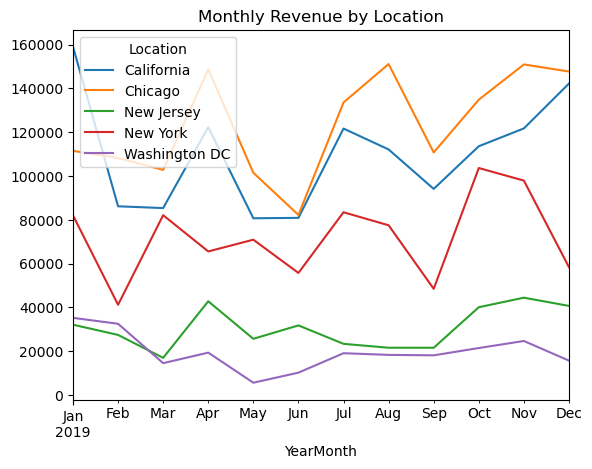

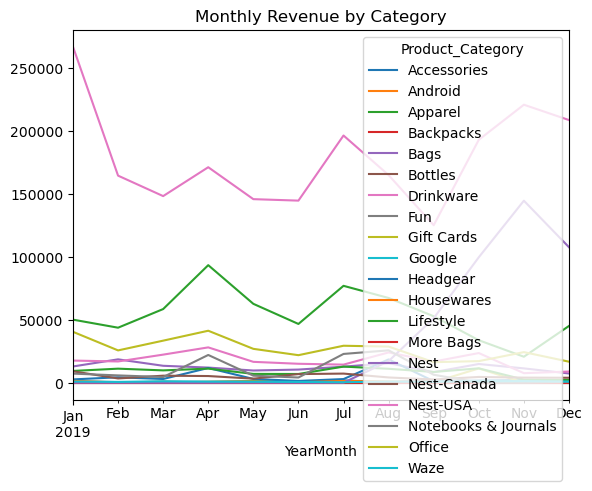

In [536]:
# Trends by category and location



location_trends = merged_data.groupby(['YearMonth', 'Location'])['Invoice_Value'].sum().unstack().fillna(0)
location_trends.plot(kind='line', title='Monthly Revenue by Location')

location_trends = merged_data.groupby(['YearMonth', 'Product_Category'])['Invoice_Value'].sum().unstack().fillna(0)
location_trends.plot(kind='line', title='Monthly Revenue by Category')





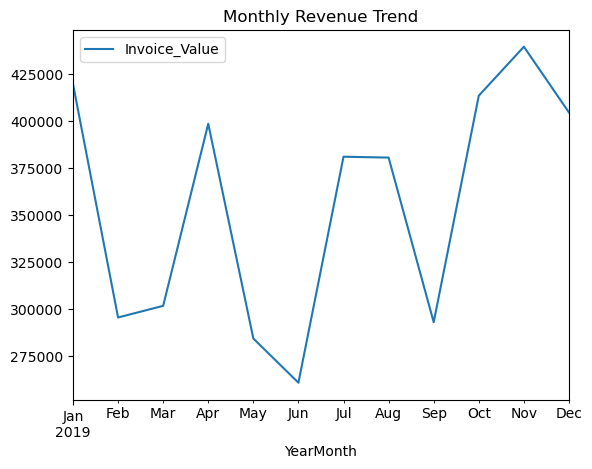

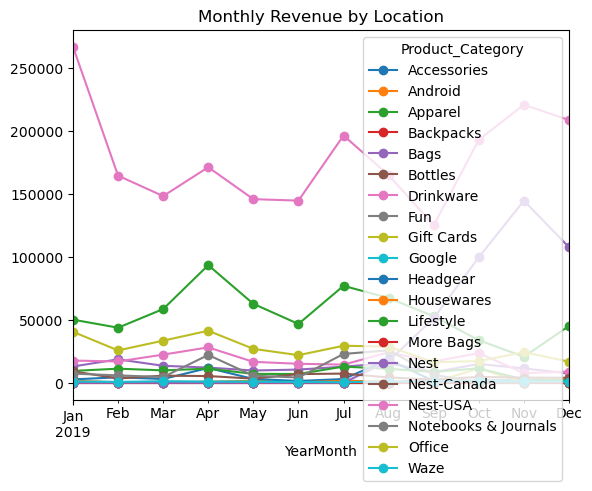

In [537]:

# Seasonality by month

monthly_trends = merged_data.groupby('YearMonth')['Invoice_Value'].sum().reset_index()
monthly_trends.plot(kind='line', x='YearMonth', y='Invoice_Value', title='Monthly Revenue Trend')

ax = location_trends.plot(kind='line', title='Monthly Revenue by Location', marker='o')

In [538]:

# How number order varies and sales with different day


# Extract day of the week
merged_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

# Group by DayOfWeek to calculate the number of orders and total sales
orders_sales_by_day = merged_data.groupby('DayOfWeek').agg(
    Number_of_Orders=('Transaction_ID', 'nunique'),
    Total_Sales=('Invoice_Value', 'sum')
).reset_index()

# Reorder the days to be in the correct sequence
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_sales_by_day['DayOfWeek'] = pd.Categorical(orders_sales_by_day['DayOfWeek'], categories=day_order, ordered=True)
orders_sales_by_day = orders_sales_by_day.sort_values('DayOfWeek')

print(orders_sales_by_day)




   DayOfWeek  Number_of_Orders    Total_Sales
1     Monday              2130  324959.042835
5    Tuesday              2315  358117.534862
6  Wednesday              4378  762367.303948
4   Thursday              4278  771158.533692
0     Friday              4233  787109.016791
2   Saturday              3872  628020.388629
3     Sunday              3855  640321.327459


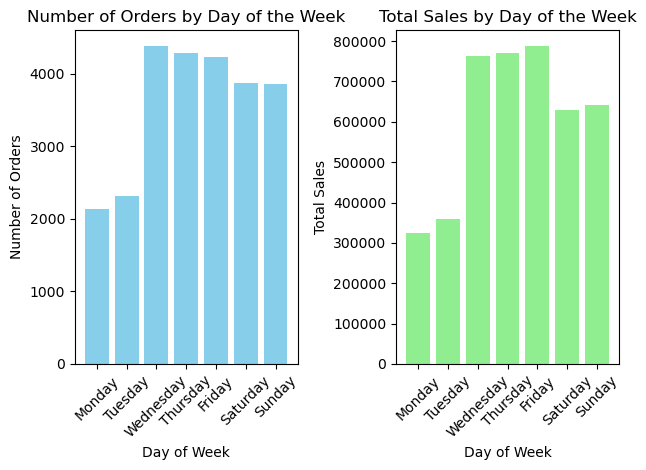

In [539]:
import matplotlib.pyplot as plt


# Plot Number of Orders by Day of the Week
plt.subplot(1, 2, 1)
plt.bar(orders_sales_by_day['DayOfWeek'], orders_sales_by_day['Number_of_Orders'], color='skyblue')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Plot Total Sales by Day of the Week
plt.subplot(1, 2, 2)
plt.bar(orders_sales_by_day['DayOfWeek'], orders_sales_by_day['Total_Sales'], color='lightgreen')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [540]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month
# Calculate the monthly revenue, marketing spend, tax, and delivery charges


monthly_aggregation = merged_data.groupby('YearMonth').agg(
    Total_Revenue=('Invoice_Value', 'sum'),
    Total_Online_Spend=('Online_Spend', 'sum'),
    Total_Offline_Spend=('Offline_Spend', 'sum'),
    Total_Delivery_Charges=('Delivery_Charges', 'sum')
).reset_index()

# Calculate total marketing spend
monthly_aggregation['Total_Marketing_Spend'] = monthly_aggregation['Total_Online_Spend'] + monthly_aggregation['Total_Offline_Spend']

# Calculate percentage of marketing spend out of revenue
monthly_aggregation['Marketing_Spend_%'] = (monthly_aggregation['Total_Marketing_Spend'] / monthly_aggregation['Total_Revenue']) * 100

# Calculate total tax (assume tax is already included in Invoice_Value calculation)
monthly_aggregation['Total_Tax'] = merged_data.groupby('YearMonth').apply(
    lambda x: (x['Invoice_Value'] * x['GST']).sum()
).values

# Calculate percentage of delivery charges out of revenue
monthly_aggregation['Delivery_Charges_%'] = (monthly_aggregation['Total_Delivery_Charges'] / monthly_aggregation['Total_Revenue']) * 100

print(monthly_aggregation)


   YearMonth  Total_Revenue  Total_Online_Spend  Total_Offline_Spend  \
0    2019-01  419758.456354          7686875.17             12365900   
1    2019-02  295405.374672          6360136.05              9481400   
2    2019-03  301601.190704          6965280.31             10488500   
3    2019-04  398528.381520          8196922.13             13459000   
4    2019-05  284208.679554          7574021.02              9951500   
5    2019-06  260680.186857          7436403.73             11189000   
6    2019-07  380978.339466          9055934.41             11563000   
7    2019-08  380507.297478         11551233.77             16834500   
8    2019-09  292894.408940          7371126.34             11886500   
9    2019-10  413457.097206          7813772.39             12722500   
10   2019-11  439517.339394          8934799.69             12161500   
11   2019-12  404516.396071         11244402.01             17720000   

    Total_Delivery_Charges  Total_Marketing_Spend  Marketing_Sp

Correlation between Total Marketing Spend and Total Revenue: 0.57


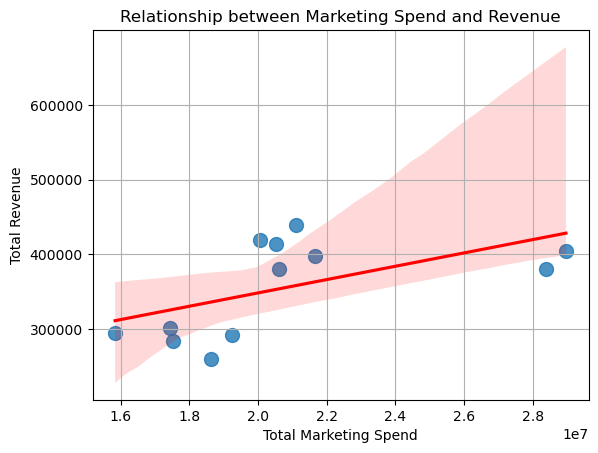

In [541]:
# Calculate the correlation between Total Marketing Spend and Total Revenue

import seaborn as sns

correlation = monthly_aggregation[['Total_Revenue', 'Total_Marketing_Spend']].corr().iloc[0, 1]
print(f'Correlation between Total Marketing Spend and Total Revenue: {correlation:.2f}')


# Create a scatter plot with regression line
sns.regplot(x='Total_Marketing_Spend', y='Total_Revenue', data=monthly_aggregation, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Relationship between Marketing Spend and Revenue')
plt.xlabel('Total Marketing Spend')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()



In [542]:
# Which product was appeared in the transactions?

# Get the unique products that appeared in transactions
unique_products = merged_data['Product_Description'].unique()

# Display unique products
print("Products that appeared in the transactions:")
print(unique_products)


Products that appeared in the transactions:
['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'
 'Google Laptop and Cell Phone Stickers'
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black"
 'Google Canvas Tote Natural/Navy' 'Sport Bag' 'Google 22 oz Water Bottle'
 'Google Infuser-Top Water Bottle' 'Engraved Ceramic Google Mug'
 'Maze Pen' 'Galaxy Screen Cleaning Cloth' 'Badge Holder'
 "YouTube Men's Short Sleeve Hero Tee Black"
 'Nest Cam Outdoor Security Camera - USA'
 'Nest Protect Smoke + CO White Wired Alarm-USA'
 "Google Men's 100% Cotton Short Sleeve Hero Tee Red"
 "Google Women's Short Sleeve Hero Tee White" 'Red Shine 15 oz Mug'
 'Compact Selfie Stick' 'Ballpoint LED Light Pen'
 'Color Changing Grip Pen' 'Colored Pencil Set'
 'Spiral Notebook and Pen Set' 'Nest Cam Indoor Security Camera - USA'
 'Android Sticker Sheet Ultra Removable' '23 oz Wide Mouth Sport Bottle'
 'YouTube Custom Decals' 'YouTube Spiral Journal with Pen'
 "Google Women's Quilted Insulated Vest Blac

In [543]:
# Which product was purchased mostly based on the quantity?

# Group by product and sum the quantities
product_quantity = merged_data.groupby('Product_Description')['Quantity'].sum().reset_index()

# Sort by quantity in descending order
product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

# Display the product with the highest quantity purchased
top_product = product_quantity.iloc[0]

print(f"The product that was purchased the most based on quantity is: {top_product['Product_Description']}")
print(f"Total Quantity Purchased: {top_product['Quantity']}")


The product that was purchased the most based on quantity is: Maze Pen
Total Quantity Purchased: 16234


## Customer Segmentation


## Heuristic (Value based, RFM)

In [544]:
np.quantile(merged_data.Invoice_Value.dropna(), 0.25)

16.81944

In [545]:
np.quantile(merged_data.Invoice_Value.dropna(), 0.5)

36.2280557

In [546]:
np.quantile(merged_data.Invoice_Value.dropna(), 0.75)

112.92231599999998

In [547]:
np.quantile(merged_data.Invoice_Value.dropna(), 0.99)

457.74954240999585

In [548]:
merged_data1=merged_data.copy()

In [549]:
# Value-based segmentation using nested np.where conditions
merged_data1['val_seg'] = np.where(merged_data1['Invoice_Value'] < 16.81944, 1, 
                          np.where(merged_data1['Invoice_Value'] < 36.22805, 2, 
                          np.where(merged_data1['Invoice_Value'] < 112.92231, 3, 4)))


In [550]:
merged_data1['Decile'] = pd.qcut(merged_data1.Invoice_Value, 10, labels=False)

In [551]:
merged_data1.head(2)

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Location,Tenure_Months,Offline_Spend,Online_Spend,Invoice_Value,YearMonth,dayofweek,DayOfWeek,val_seg,Decile
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,4500,2424.5,144.977339,2019-01,1,Tuesday,4,8.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,4500,2424.5,144.977339,2019-01,1,Tuesday,4,8.0


In [552]:
# Define a reference date for Recency calculation (e.g., the last day of the dataset)

reference_date = merged_data1['Date'].max()

# Calculate Recency (days since the last purchase)

rfm = merged_data1.groupby('CustomerID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Invoice_Value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,107,2,171.725887
1,12347,59,60,10603.987888
2,12348,73,23,1341.274742
3,12350,17,17,1080.966849
4,12356,107,36,1648.281319


In [553]:
merged_data1= pd.merge(merged_data1, rfm, on= 'CustomerID', how= 'left')

In [554]:
merged_data1.head()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Online_Spend,Invoice_Value,YearMonth,dayofweek,DayOfWeek,val_seg,Decile,Recency,Frequency,Monetary
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2424.5,144.977339,2019-01,1,Tuesday,4,8.0,339,297,34129.768638
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2424.5,144.977339,2019-01,1,Tuesday,4,8.0,339,297,34129.768638
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,2424.5,8.346845,2019-01,1,Tuesday,1,0.0,339,297,34129.768638
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,2424.5,85.526993,2019-01,1,Tuesday,3,6.0,339,297,34129.768638
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2424.5,21.376730,2019-01,1,Tuesday,2,3.0,339,297,34129.768638


In [555]:
quantiles = merged_data1[['Frequency','Monetary','Recency' ]].quantile(q=[0.33,0.67])
quantiles

,Frequency,Monetary,Recency
0.33,43.0,3121.832674,47.0
0.67,93.0,7604.691941,142.0


In [556]:
# Recency segmentation
merged_data1['r_seg'] = np.where(merged_data1['Recency'] <= 47.0, 'Active', 
                        np.where(merged_data1['Recency'] <= 142.0, 'At Risk', 'Churn'))

# Monetary segmentation
merged_data1['m_seg'] = np.where(merged_data1['Monetary'] <= 3121.832674, 1, 
                        np.where(merged_data1['Monetary'] <= 7604.691941, 2, 3))

# Frequency segmentation 
merged_data1['f_seg'] = np.where(merged_data1['Frequency'] <= 43.0, 1, 
                        np.where(merged_data1['Frequency'] <= 93.0, 2, 3))


In [557]:
merged_data1.head(5)

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,dayofweek,DayOfWeek,val_seg,Decile,Recency,Frequency,Monetary,r_seg,m_seg,f_seg
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,1,Tuesday,4,8.0,339,297,34129.768638,Churn,3,3
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,1,Tuesday,4,8.0,339,297,34129.768638,Churn,3,3
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,1,Tuesday,1,0.0,339,297,34129.768638,Churn,3,3
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,1,Tuesday,3,6.0,339,297,34129.768638,Churn,3,3
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,1,Tuesday,2,3.0,339,297,34129.768638,Churn,3,3


In [558]:
merged_data1['fm_seg'] = np.where(((merged_data1.f_seg == 3) & (merged_data1.m_seg ==3)) , 'Platinum',
                          np.where((((merged_data1.f_seg == 3) & (merged_data1.m_seg ==2)) | ((merged_data1.f_seg == 2) & (merged_data1.m_seg ==3))) , 'Gold',
                          np.where((((merged_data1.f_seg == 1) & (merged_data1.m_seg ==3)) | ((merged_data1.f_seg == 3) & (merged_data1.m_seg ==1)) | ((merged_data1.f_seg == 2) & (merged_data1.m_seg ==2))), 'Silver', 'Standard' )))

In [559]:
merged_data1.head()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,DayOfWeek,val_seg,Decile,Recency,Frequency,Monetary,r_seg,m_seg,f_seg,fm_seg
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Tuesday,4,8.0,339,297,34129.768638,Churn,3,3,Platinum
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Tuesday,4,8.0,339,297,34129.768638,Churn,3,3,Platinum
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,Tuesday,1,0.0,339,297,34129.768638,Churn,3,3,Platinum
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,Tuesday,3,6.0,339,297,34129.768638,Churn,3,3,Platinum
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,Tuesday,2,3.0,339,297,34129.768638,Churn,3,3,Platinum


In [560]:
merged_data1[['Recency', 'Monetary', 'Frequency',  'r_seg', 'fm_seg']].groupby(['r_seg', 'fm_seg']).mean().T

r_seg           Active                                              At Risk  \
fm_seg            Gold      Platinum       Silver     Standard         Gold   
Recency      24.887335     19.947154    24.315622    23.741914    98.789704   
Monetary   9778.041254  25009.582681  5540.478659  2224.535704  7552.728333   
Frequency    84.689200    285.700580    66.214665    27.354447    95.974259   

r_seg                                                    Churn                \
fm_seg         Platinum       Silver     Standard         Gold      Platinum   
Recency       88.175623    90.310714    97.858783   226.704023    228.144487   
Monetary   21542.393725  4808.080675  2065.000690  7377.928349  13968.711720   
Frequency    245.878732    65.719616    29.819056    92.718391    164.723384   

r_seg                                
fm_seg          Silver     Standard  
Recency     241.442666   230.661808  
Monetary   5002.497453  1833.270481  
Frequency    65.781913    26.758341

In [561]:
# Cross sell/Upsell campaign = data to campaign team = how to prioritize the customers?


merged_data1[((merged_data1.r_seg=='Active') & (merged_data1.fm_seg=='Platinum'))]  # priority-1

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,DayOfWeek,val_seg,Decile,Recency,Frequency,Monetary,r_seg,m_seg,f_seg,fm_seg
106,15311,16748,2019-01-02,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Not Used,...,Wednesday,4,8.0,12,587,67695.561369,Active,3,3,Platinum
107,15311,16749,2019-01-02,GGOEGALP036317,Google Women's Long Sleeve Tee Lavender,Apparel,1,24.75,6.50,Not Used,...,Wednesday,2,4.0,12,587,67695.561369,Active,3,3,Platinum
108,15311,16749,2019-01-02,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Not Used,...,Wednesday,1,0.0,12,587,67695.561369,Active,3,3,Platinum
109,15311,16749,2019-01-02,GGOEYFKQ020699,YouTube Custom Decals,Office,1,2.05,6.50,Used,...,Wednesday,1,0.0,12,587,67695.561369,Active,3,3,Platinum
110,15311,16750,2019-01-02,GGOEGADB057316,Google Men's Lightweight Microfleece Jacket Black,Apparel,1,61.89,6.50,Not Used,...,Wednesday,3,5.0,12,587,67695.561369,Active,3,3,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52885,14606,48465,2019-12-31,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.50,Clicked,...,Tuesday,4,7.0,0,575,51144.493735,Active,3,3,Platinum
52886,14606,48466,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,3,80.52,6.50,Used,...,Tuesday,4,8.0,0,575,51144.493735,Active,3,3,Platinum
52887,14606,48467,2019-12-31,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,12.99,Clicked,...,Tuesday,4,7.0,0,575,51144.493735,Active,3,3,Platinum
52888,14606,48467,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,12.99,Not Used,...,Tuesday,4,9.0,0,575,51144.493735,Active,3,3,Platinum


In [562]:
merged_data1[((merged_data1.r_seg=='Active') & (merged_data1.fm_seg=='Gold'))]  # priority-2

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,DayOfWeek,val_seg,Decile,Recency,Frequency,Monetary,r_seg,m_seg,f_seg,fm_seg
253,13408,16858,2019-01-03,GGOEGAEB027815,Google Women's Short Sleeve Hero Tee Black,Apparel,1,14.02,6.5,Used,...,Thursday,2,3.0,32,78,7796.675139,Active,3,2,Gold
254,13408,16858,2019-01-03,GGOEGAEQ027914,Google Women's Short Sleeve Hero Tee White,Apparel,1,14.02,6.5,Used,...,Thursday,2,3.0,32,78,7796.675139,Active,3,2,Gold
255,13408,16859,2019-01-03,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,...,Thursday,4,8.0,32,78,7796.675139,Active,3,2,Gold
256,13408,16860,2019-01-03,GGOENEBB081499,Nest Cam Indoor Security Camera - CA,Nest-Canada,1,153.71,8.7,Clicked,...,Thursday,4,8.0,32,78,7796.675139,Active,3,2,Gold
257,13408,16861,2019-01-03,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,...,Thursday,4,7.0,32,78,7796.675139,Active,3,2,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52625,13069,48244,2019-12-27,GGOEGAEB091113,Google Zip Hoodie Black,Apparel,1,48.92,6.5,Used,...,Friday,3,5.0,3,138,7381.117943,Active,2,3,Gold
52626,13069,48245,2019-12-27,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,...,Friday,3,6.0,3,138,7381.117943,Active,2,3,Gold
52627,13069,48248,2019-12-28,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Used,...,Saturday,3,6.0,3,138,7381.117943,Active,2,3,Gold
52628,13069,48249,2019-12-28,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.5,Not Used,...,Saturday,4,7.0,3,138,7381.117943,Active,2,3,Gold


In [563]:
merged_data1[((merged_data1.r_seg=='Active') & (merged_data1.fm_seg=='Silver'))]  # priority-3

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,DayOfWeek,val_seg,Decile,Recency,Frequency,Monetary,r_seg,m_seg,f_seg,fm_seg
86,14688,16732,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,...,Tuesday,4,8.0,32,58,6343.404729,Active,2,2,Silver
87,14688,16733,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Clicked,...,Tuesday,4,7.0,32,58,6343.404729,Active,2,2,Silver
88,14688,16736,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Tuesday,4,8.0,32,58,6343.404729,Active,2,2,Silver
89,14688,16737,2019-01-02,GGOEGHPJ080110,Google 5-Panel Cap,Headgear,2,19.59,6.5,Clicked,...,Wednesday,3,5.0,32,58,6343.404729,Active,2,2,Silver
90,14688,16738,2019-01-02,GGOEAKDH019899,Windup Android,Lifestyle,2,3.29,6.5,Clicked,...,Wednesday,1,1.0,32,58,6343.404729,Active,2,2,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52808,16745,48405,2019-12-30,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,80.52,6.5,Clicked,...,Monday,3,5.0,1,58,4254.644678,Active,2,2,Silver
52809,16745,48406,2019-12-30,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,3,121.30,6.5,Not Used,...,Monday,4,9.0,1,58,4254.644678,Active,2,2,Silver
52810,16745,48406,2019-12-30,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,5,80.52,6.5,Clicked,...,Monday,4,9.0,1,58,4254.644678,Active,2,2,Silver
52811,16745,48407,2019-12-30,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,5,80.52,6.5,Clicked,...,Monday,4,9.0,1,58,4254.644678,Active,2,2,Silver


## Scientific (Using K-Means) & Understand the profiles

In [564]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,107,2,171.725887
1,12347,59,60,10603.987888
2,12348,73,23,1341.274742
3,12350,17,17,1080.966849
4,12356,107,36,1648.281319


In [565]:
#Handling missings

def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

rfm_new=rfm.apply(lambda x: Missing_imputation(x))

In [566]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99))
    return x

rfm_new=rfm_new.apply(lambda x: outlier_capping(x))

In [567]:

# Normalize the data before clustering

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_new[['Recency', 'Frequency', 'Monetary']])




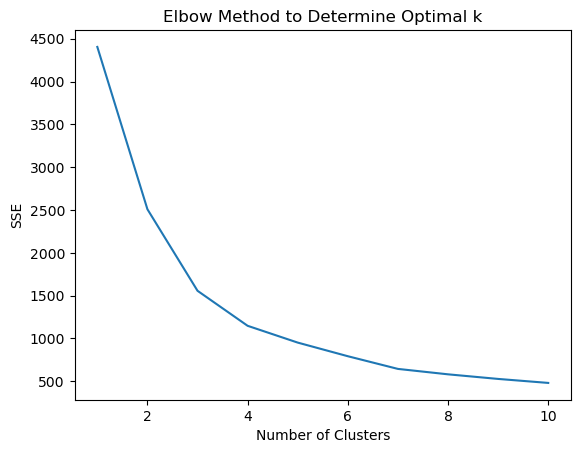

In [568]:
# Determine the optimal number of clusters using the Elbow Method

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the elbow curve
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [569]:
clusters_df = pd.DataFrame( { "num_clusters":k_range, "cluster_errors": sse } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,4404.000000
1,2,2508.623543
2,3,1556.415392
3,4,1147.644150
4,5,951.547875
5,6,792.485223
6,7,644.331830
7,8,581.067766
8,9,527.322683
9,10,480.710332


In [570]:
# Apply K-Means with the selected number of clusters ( 4)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm1= rfm.copy()
rfm1['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze cluster characteristics
cluster_summary = rfm1.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Number of customers in each cluster
}).reset_index()

print(cluster_summary)


   Cluster     Recency   Frequency      Monetary  CustomerID
0        0  255.053950   18.279383   1365.600078         519
1        1   72.600000  204.366667  18017.760938          60
2        2  101.481633   74.848980   6200.193784         245
3        3   77.995342   19.933230   1495.642196         644


In [571]:

# Adding descriptive labels for each cluster based on the mean values

def assign_cluster_label(row):
    if row['Recency'] <= 72.600000 and row['Frequency'] >= 204.366667 and row['Monetary'] >= 18017.760938           :
        return 'Premium'
    elif row['Recency']<= 101.481633    and row['Frequency'] >= 74.848980 and row['Monetary'] >= 6200.193784         :
        return 'Gold'
    elif row['Recency'] <= 77.995342    and row['Frequency'] >= 19.933230    and row['Monetary'] >= 1495.642196         :
        return 'Silver'
    else:
        return 'Standard'

# Apply this to create a strategic label for each cluster
cluster_summary['Segment'] = cluster_summary.apply(assign_cluster_label, axis=1)

# Display the segmented clusters with strategy
print(cluster_summary)

# Example of marketing strategies for each segment
def define_marketing_strategy(segment):
    if segment == 'Premium':
        return "Offer exclusive loyalty programs, VIP services, and early access to products."
    elif segment == 'Gold':
        return "Provide targeted promotions and discounts to encourage more frequent purchases."
    elif segment == 'Silver':
        return "Use personalized emails and offers to boost customer engagement and spending."
    else:
        return "Send reactivation campaigns, discounts, or reminders to bring them back to purchase."

# Adding marketing strategy to the profiles
cluster_summary['Marketing_Strategy'] = cluster_summary['Segment'].apply(define_marketing_strategy)

# Display the final strategy table
print(cluster_summary[['Cluster', 'Segment', 'Marketing_Strategy']])


   Cluster     Recency   Frequency      Monetary  CustomerID   Segment
0        0  255.053950   18.279383   1365.600078         519  Standard
1        1   72.600000  204.366667  18017.760938          60      Gold
2        2  101.481633   74.848980   6200.193784         245  Standard
3        3   77.995342   19.933230   1495.642196         644  Standard
   Cluster   Segment                                 Marketing_Strategy
0        0  Standard  Send reactivation campaigns, discounts, or rem...
1        1      Gold  Provide targeted promotions and discounts to e...
2        2  Standard  Send reactivation campaigns, discounts, or rem...
3        3  Standard  Send reactivation campaigns, discounts, or rem...


In [572]:
# Defining marketing strategies based on cluster profiles
def define_marketing_strategy(cluster):
    if cluster == 2:  # High Frequency, High Monetary, Low Recency
        return "Premium: Focus on retaining these high-value customers by offering VIP programs, early access to sales, and personalized offers."
    elif cluster == 1:  # Low Recency, High Frequency, High Monetary
        return "Gold: Frequent buyers but may not need as much engagement. Offer occasional discounts and loyalty rewards to keep them engaged."
    elif cluster == 3:  # Moderate Recency, Moderate Frequency, Moderate Monetary
        return "Silver: Engage these customers with personalized recommendations and promotions to increase spending."
    else:  # High Recency, Low Frequency, Low Monetary
        return "Standard: These customers are at risk of churn. Reactivate them with special offers, discounts, and targeted email campaigns."

# Applying the marketing strategy for each cluster
cluster_summary['Marketing_Strategy'] = cluster_summary['Cluster'].apply(define_marketing_strategy)

# Display the final strategy table with marketing strategies
cluster_summary[['Cluster', 'Recency', 'Frequency', 'Monetary', 'CustomerID', 'Marketing_Strategy']]


,Cluster,Recency,Frequency,Monetary,CustomerID,Marketing_Strategy
0,0,255.053950,18.279383,1365.600078,519,Standard: These customers are at risk of churn...
1,1,72.600000,204.366667,18017.760938,60,Gold: Frequent buyers but may not need as much...
2,2,101.481633,74.848980,6200.193784,245,Premium: Focus on retaining these high-value c...
3,3,77.995342,19.933230,1495.642196,644,Silver: Engage these customers with personaliz...


## Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [573]:
# Calculate total revenue per customer
customer_revenue = merged_data.groupby('CustomerID')['Invoice_Value'].sum().reset_index()

# Rename the column 
customer_revenue.columns = ['CustomerID', 'Total_Revenue']

customer_revenue.head()


,CustomerID,Total_Revenue
0,12346,171.725887
1,12347,10603.987888
2,12348,1341.274742
3,12350,1080.966849
4,12356,1648.281319


In [574]:
# Create percentiles for Low, Medium, High categories

low_value_threshold = customer_revenue['Total_Revenue'].quantile(0.33)
high_value_threshold = customer_revenue['Total_Revenue'].quantile(0.66)

# Define CLV categories
def categorize_revenue(revenue):
    if revenue <= low_value_threshold:
        return 'Low Value'
    elif revenue <= high_value_threshold:
        return 'Medium Value'
    else:
        return 'High Value'

# Apply the function to create the categories
customer_revenue['CLV_Category'] = customer_revenue['Total_Revenue'].apply(categorize_revenue)

customer_revenue.head()


,CustomerID,Total_Revenue,CLV_Category
0,12346,171.725887,Low Value
1,12347,10603.987888,High Value
2,12348,1341.274742,Medium Value
3,12350,1080.966849,Medium Value
4,12356,1648.281319,Medium Value


In [575]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,107,2,171.725887
1,12347,59,60,10603.987888
2,12348,73,23,1341.274742
3,12350,17,17,1080.966849
4,12356,107,36,1648.281319


In [576]:

# Merge RFM data and customer revenue data

customer_features = pd.merge(rfm, customer_revenue[['CustomerID', 'CLV_Category']], on='CustomerID', how='inner')

customer_features.drop(columns=['CustomerID'], axis=1)


,Recency,Frequency,Monetary,CLV_Category
0,107,2,171.725887,Low Value
1,59,60,10603.987888,High Value
2,73,23,1341.274742,Medium Value
3,17,17,1080.966849,Medium Value
4,107,36,1648.281319,Medium Value
...,...,...,...,...
1463,270,7,746.337486,Low Value
1464,87,40,2369.166553,Medium Value
1465,194,8,140.122949,Low Value
1466,69,1,274.468200,Low Value


In [577]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target variable)

X = customer_features.drop('CLV_Category', axis=1)
y = customer_features['CLV_Category']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1174, 4), (294, 4), (1174,), (294,))

In [578]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)



In [579]:
# Train the model

rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [580]:
# Make predictions on the test data

y_pred = rf_model.predict(X_test)

y_pred

array(['High Value', 'Medium Value', 'Low Value', 'High Value',
       'High Value', 'Medium Value', 'Medium Value', 'Medium Value',
       'Medium Value', 'Medium Value', 'High Value', 'Low Value',
       'Low Value', 'Medium Value', 'Medium Value', 'Medium Value',
       'Medium Value', 'High Value', 'Medium Value', 'High Value',
       'Low Value', 'High Value', 'High Value', 'Medium Value',
       'Medium Value', 'High Value', 'High Value', 'Medium Value',
       'Medium Value', 'Low Value', 'High Value', 'Low Value',
       'Low Value', 'Medium Value', 'Medium Value', 'Medium Value',
       'High Value', 'Low Value', 'Low Value', 'Low Value',
       'Medium Value', 'Medium Value', 'Low Value', 'Low Value',
       'Low Value', 'Low Value', 'Medium Value', 'Medium Value',
       'Low Value', 'High Value', 'Low Value', 'High Value', 'High Value',
       'Medium Value', 'High Value', 'High Value', 'Medium Value',
       'Medium Value', 'Low Value', 'Medium Value', 'Medium Value',
    

In [581]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9965986394557823


In [582]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

  High Value       1.00      1.00      1.00       100
   Low Value       1.00      0.99      0.99        94
Medium Value       0.99      1.00      1.00       100

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294


Confusion Matrix:
 [[100   0   0]
 [  0  93   1]
 [  0   0 100]]


## Cross Selling( Which products are selling together)

In [583]:
!pip install mlxtend

In [584]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [585]:
merged_data.head()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Invoice_Value,YearMonth,dayofweek,DayOfWeek
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,M,Chicago,12,4500,2424.5,144.977339,2019-01,1,Tuesday
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,M,Chicago,12,4500,2424.5,144.977339,2019-01,1,Tuesday
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.10,M,Chicago,12,4500,2424.5,8.346845,2019-01,1,Tuesday
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.18,M,Chicago,12,4500,2424.5,85.526993,2019-01,1,Tuesday
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,0.18,M,Chicago,12,4500,2424.5,21.376730,2019-01,1,Tuesday


In [586]:
# Count the frequency of each product

product_frequency = merged_data['Product_Description'].value_counts().reset_index()
product_frequency.columns = ['Product_Description', 'Frequency']

# View the most frequently purchased products

product_frequency.head(10)


,Product_Description,Frequency
0,Nest Learning Thermostat 3rd Gen-USA - Stainle...,3511
1,Nest Cam Outdoor Security Camera - USA,3328
2,Nest Cam Indoor Security Camera - USA,3230
3,Google Sunglasses,1523
4,Nest Protect Smoke + CO White Battery Alarm-USA,1361
5,Nest Learning Thermostat 3rd Gen-USA - White,1089
6,Nest Protect Smoke + CO White Wired Alarm-USA,1065
7,Google 22 oz Water Bottle,902
8,Nest Thermostat E - USA,844
9,Google Laptop and Cell Phone Stickers,806


In [587]:
# Group by Transaction_ID and aggregate Product_Description

grouped_transactions = merged_data.groupby('Transaction_ID')['Product_Description'].apply(list)

# View the first few transactions to see product combinations
grouped_transactions.head()


Transaction_ID
16679    [Nest Learning Thermostat 3rd Gen-USA - Stainl...
16680    [Nest Learning Thermostat 3rd Gen-USA - Stainl...
16681              [Google Laptop and Cell Phone Stickers]
16682    [Google Men's 100% Cotton Short Sleeve Hero Te...
16684    [Nest Cam Outdoor Security Camera - USA, Nest ...
Name: Product_Description, dtype: object

In [588]:
basket = merged_data.groupby(['Transaction_ID', 'Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID')


In [589]:
basket.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [590]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.

# Convert the units to 1 hot encoded values

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1    

In [591]:
basket_sets = basket.map(encode_units)

In [592]:
basket_sets.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [593]:
# Generate frequent item sets that have a support of at least 7% 

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [594]:
frequent_itemsets.head()

,support,itemsets
0,0.016280,(26 oz Double Wall Insulated Bottle)
1,0.010295,(8 pc Android Sticker Sheet)
2,0.013886,(BLM Sweatshirt)
3,0.010175,(Badge Holder)
4,0.011173,(Ballpoint LED Light Pen)


In [595]:
# Generate association rules with a minimum confidence of 0.1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# View the generated association rules
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.128886,0.132796,0.027653,0.214551,1.615644,0.010537,1.104087,0.437430
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.132796,0.128886,0.027653,0.208233,1.615644,0.010537,1.100216,0.439403


In [596]:
# Sort rules by lift to find the strongest associations
strong_rules = rules.sort_values(by='lift', ascending=False)

# View the top 10 strongest rules
strong_rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.128886,0.132796,0.027653,0.214551,1.615644,0.010537,1.104087,0.437430
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.132796,0.128886,0.027653,0.208233,1.615644,0.010537,1.100216,0.439403


In [597]:
basket['Nest Cam Indoor Security Camera - USA'].sum()

4402.0

In [598]:
basket['Nest Cam Outdoor Security Camera - USA'].sum()

5206.0

## Predicting Next Purchase Day(How soon each customer can visit the store)mer.

In [599]:
# Calculate the days between each transaction for every customer

merged_data3 = merged_data.sort_values(by=['CustomerID', 'Date'])
merged_data3['Prev_Transaction_Date'] = merged_data3.groupby('CustomerID')['Date'].shift(1)
merged_data3['Days_Between'] = (merged_data3['Date'] - merged_data3['Prev_Transaction_Date']).dt.days

In [600]:

# Filter only repeat customers

repeat_customers = merged_data3.dropna(subset=['Prev_Transaction_Date'])


repeat_customers.head()

,CustomerID,Transaction_ID,Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Location,Tenure_Months,Offline_Spend,Online_Spend,Invoice_Value,YearMonth,dayofweek,DayOfWeek,Prev_Transaction_Date,Days_Between
38125,12346,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,...,New York,31,3000,2546.67,82.707700,2019-09,6,Sunday,2019-09-15,0.0
10668,12347,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,...,New York,20,2000,1984.00,21.409993,2019-03,6,Sunday,2019-03-24,0.0
10669,12347,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,...,New York,20,2000,1984.00,110.904300,2019-03,6,Sunday,2019-03-24,0.0
10670,12347,23980,2019-03-24,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,79.00,6.50,Clicked,...,New York,20,2000,1984.00,283.276500,2019-03,6,Sunday,2019-03-24,0.0
10671,12347,23981,2019-03-24,GGOEGBFC018799,Electronics Accessory Pouch,Bags,4,4.99,49.73,Not Used,...,New York,20,2000,1984.00,63.727150,2019-03,6,Sunday,2019-03-24,0.0


In [601]:
# Calculate the average days between transactions per customer

avg_days_per_customer = repeat_customers.groupby('CustomerID')['Days_Between'].mean().reset_index()

avg_days_per_customer.columns = ['CustomerID', 'Avg_Days_Between']


avg_days_per_customer.head()

,CustomerID,Avg_Days_Between
0,12346,0.000000
1,12347,3.779661
2,12348,5.409091
3,12350,0.000000
4,12356,0.000000


In [602]:
# Create a categorical variable for prediction (0-30, 30-60, 60-90, 90+ days)

def categorize_days(avg_days):
    if avg_days <= 30:
        return '0-30 days'
    elif avg_days <= 60:
        return '30-60 days'
    elif avg_days <= 90:
        return '60-90 days'
    else:
        return '90+ days'

avg_days_per_customer['Next_Purchase_Window'] = avg_days_per_customer['Avg_Days_Between'].apply(categorize_days)

avg_days_per_customer.head()

,CustomerID,Avg_Days_Between,Next_Purchase_Window
0,12346,0.000000,0-30 days
1,12347,3.779661,0-30 days
2,12348,5.409091,0-30 days
3,12350,0.000000,0-30 days
4,12356,0.000000,0-30 days


In [603]:
# Merge this with customer data to prepare for modeling

customer_data = pd.merge(merged_data, avg_days_per_customer[['CustomerID', 'Next_Purchase_Window']], on='CustomerID', how='left')

# Drop rows with missing target variable

customer_data = customer_data.dropna(subset=['Next_Purchase_Window'])

In [604]:
# Recency: Days since last purchase

customer_data['Recency'] = (customer_data['Date'].max() - customer_data['Date']).dt.days

# Frequency: Number of purchases made by each customer

frequency = customer_data.groupby('CustomerID')['Date'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Monetary: Total spending by each customer

monetary = customer_data.groupby('CustomerID')['Invoice_Value'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']





In [605]:
# Merge the RFM features into one DataFrame

rfm_data = pd.merge(frequency, monetary, on='CustomerID')
rfm_data = pd.merge(rfm_data, avg_days_per_customer[['CustomerID', 'Next_Purchase_Window']], on='CustomerID')
rfm_data = pd.merge(rfm_data, customer_data[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID')

In [606]:
rfm_data.head(20)

,CustomerID,Frequency,Monetary,Next_Purchase_Window,Recency
0,12346,1,171.725887,0-30 days,107
1,12347,3,10603.987888,0-30 days,282
2,12347,3,10603.987888,0-30 days,60
3,12347,3,10603.987888,0-30 days,59
4,12348,2,1341.274742,0-30 days,192
5,12348,2,1341.274742,0-30 days,73
6,12350,1,1080.966849,0-30 days,17
7,12356,1,1648.281319,0-30 days,107
8,12359,1,578.205425,0-30 days,130
9,12370,2,6144.737013,0-30 days,219


In [607]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)

X = rfm_data[['Recency', 'Frequency', 'Monetary']]
y = rfm_data['Next_Purchase_Window']




In [608]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [609]:
#Initialize the model

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [610]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

y_pred

array(['0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '30-60 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-30 days',
       '0-30 days', '0-30 days', '0-30 days', '0-30 days', '0-3

In [611]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9904559915164369


In [612]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

   0-30 days       0.99      1.00      1.00       930
  30-60 days       0.75      0.33      0.46         9
  60-90 days       0.00      0.00      0.00         1
    90+ days       0.50      0.33      0.40         3

    accuracy                           0.99       943
   macro avg       0.56      0.42      0.46       943
weighted avg       0.99      0.99      0.99       943



## Perform Cohort Analysis

In [613]:

# Extract the first purchase month for each customer

merged_data['First_Purchase_Month'] = merged_data.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')

# Create a 'CohortMonth' column representing the cohort each customer belongs to

merged_data['CohortMonth'] = merged_data['First_Purchase_Month']



In [614]:

# Create a 'Transaction_Month' column to track purchases over time

merged_data['Transaction_Month'] = merged_data['Date'].dt.to_period('M')

In [615]:
#Calculate Retention rate


In [616]:
# Calculate the difference between the transaction month and cohort month in months

merged_data['CohortIndex'] = (merged_data['Transaction_Month'] - merged_data['CohortMonth']).apply(lambda x: x.n)

# Count the number of unique customers per cohort and month

cohort_data = merged_data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to get retention rates in a matrix format

cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')


In [617]:
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [618]:
# Divide each row by the number of customers in the first month (CohortIndex = 0) to get the retention rates

cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

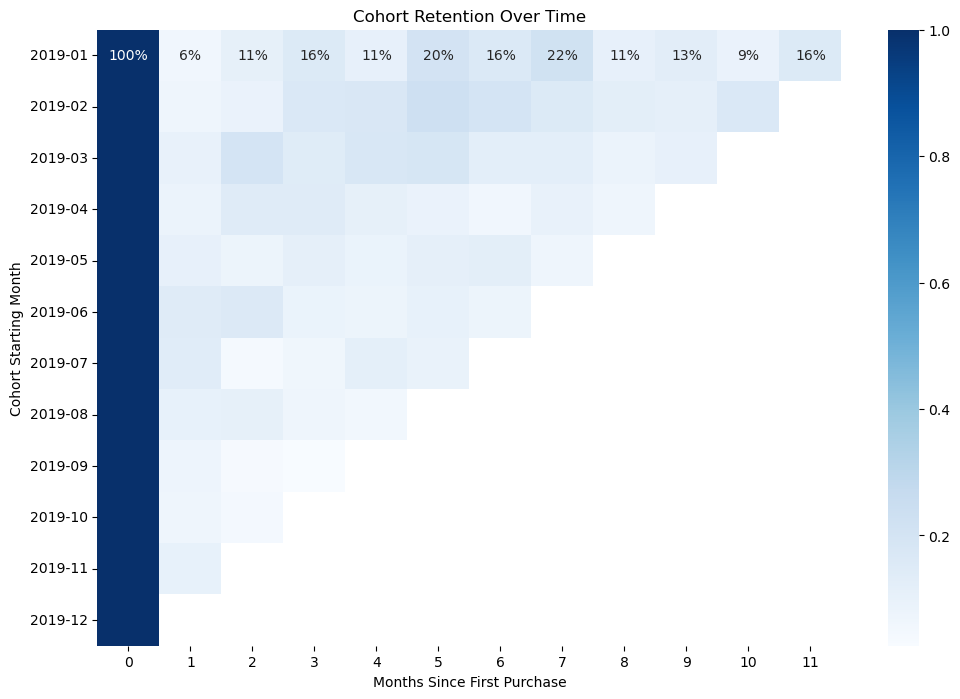

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Over Time')
plt.ylabel('Cohort Starting Month')
plt.xlabel('Months Since First Purchase')
plt.show()


In [620]:
# Calculate the average retention for each cohort

average_retention = retention_matrix.mean(axis=1)

# Find the cohort with the maximum average retention

max_retention_cohort = average_retention.idxmax()

print(f"Cohort with Maximum Retention: {max_retention_cohort}")
print(f"Average Retention Rate for {max_retention_cohort}: {average_retention[max_retention_cohort]:.2%}")


Cohort with Maximum Retention: 2019-12
Average Retention Rate for 2019-12: 100.00%
